In [1]:
from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import numpy
import numpy as np
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
from tensorflow.keras import optimizers 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from tensorflow.keras.utils import *
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.utils
from numpy import argmax
import seaborn as sn 

from random import seed
from random import randint
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
#X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers.npy').astype(np.int16)
#Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers_labels.npy').astype(np.int16)

X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_PosKmers.npy').astype(np.int16)
Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_PosKmers_labels.npy').astype(np.int16)

(67305, 508, 508)
(67305, 1)
(67305, 224, 224)
[ 1  3  4  8  9 12 13 14 16 17 18 19 20]
31


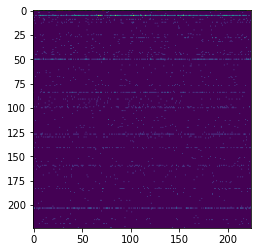

12


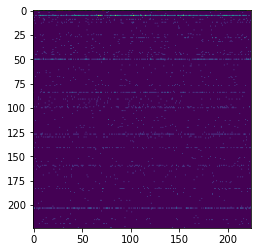

77


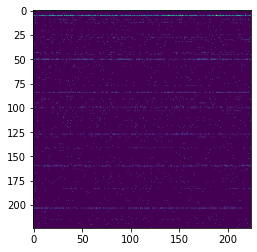

3793


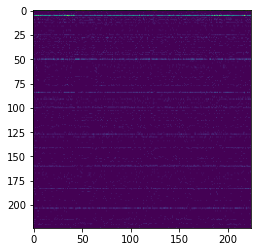

213


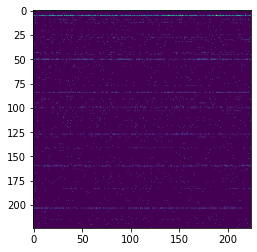

29


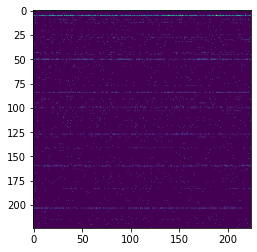

13


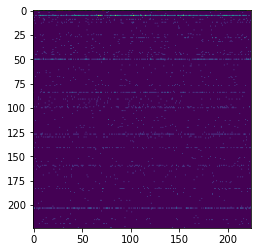

1291


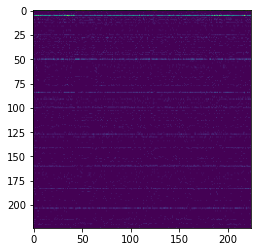

1147


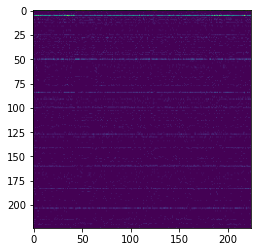

967


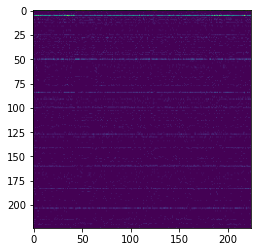

0


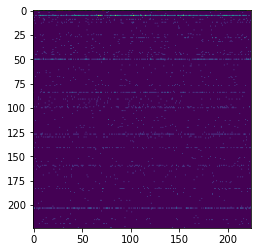

36


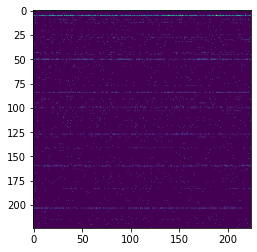

7


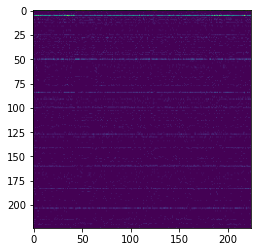

In [4]:
print(X.shape)
print(Y.shape)

X_resized = np.zeros((67305, 224, 224))

for i in range(X.shape[0]):
    X_resized[i] = cv2.resize(X[i], (224, 224), cv2.INTER_LINEAR)
    #if X_resized[i].max()!=0:
        #print(X_resized[i].max())
        #X_resized[i] = X_resized[i] / X_resized[i].max()

print(X_resized.shape)

X = X_resized
X_resized = None

type(X[0, 0, 0])

print(np.unique(Y))

"""figure, axes = plt.subplots(nrows=1, ncols=10)
for j in range(10):
    indexes = np.where(Y == 1)
    sel_i = randint(0, len(indexes))
    print(indexes[0][sel_i])
    axes[0, j].imshow(X[sel_i, :, :])

figure.tight_layout()"""

indexes = np.where(Y == 1)
sel_i = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 3)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 4)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 8)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 9)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 12)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 13)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 14)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 16)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 17)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 18)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 19)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 20)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

In [5]:
print(X[0,:,:])

[[3. 5. 6. ... 5. 5. 6.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
"""scalers = {}
feature_vectors_scaler = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
for i in range(X.shape[1]):
    scalers[i] = preprocessing.StandardScaler()
    feature_vectors_scaler[:, i, :] = scalers[i].fit_transform(X[:, i, :]) """

#data split: 80% train, 10% dev and 10% test
validation_size = 0.2
seed = 7
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=0.5, random_state=seed)

print(X_train.shape)
print(Y_train.shape)
print(X_dev.shape)
print(Y_dev.shape)
print(X_test.shape)
print(Y_test.shape)

(53844, 224, 224)
(53844, 1)
(6730, 224, 224)
(6730, 1)
(6731, 224, 224)
(6731, 1)


In [ ]:
print(X.shape)
print(Y.shape)

type(X[0, 0, 0])

print(np.unique(Y))

indexes = np.where(Y == 1)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 3)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 4)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 8)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 9)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 12)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 13)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 14)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 16)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 17)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 18)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 19)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

indexes = np.where(Y == 20)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(feature_vectors_scaler[sel_i, :, :])
plt.show()

In [7]:
feature_vectors_scaler = None
X = None
Y = None
path_log_base = './logs_CNN'

In [8]:
def metrics(Y_validation,predictions):
    
    classes = len(numpy.unique(Y_validation))
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(classes), range(classes))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()

In [9]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [10]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [11]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Test F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Train F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['val_f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Validation F1-Score {}, Época:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('F1-Score Vs Epoch')
        plt.ylabel('F1-Score')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.pdf', format='pdf')     
        #plt.show()
        
        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.pdf', format='pdf') 
        plt.show() 

In [12]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, one_hot_labels_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [13]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    # early stopping
    es = EarlyStopping(monitor='loss', patience=20, mode='min', verbose=1)
    
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    
    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint,es], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [14]:
################################################## 30 SRM FILTERS
srm_weights = np.load('SRM_Kernels1.npy') 
biasSRM=numpy.ones(30)
print (srm_weights.shape)
################################################## TLU ACTIVATION FUNCTION
T3 = 3;
def Tanh3(x):
    tanh3 = K.tanh(x)*T3
    return tanh3
##################################################

(5, 5, 1, 30)


In [15]:
def TERL():
    tf.keras.backend.clear_session()

    # FNN implemented by Nakano

    # Inputs
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2], 1), name="input_1")
    #Layer 1
    layers = tf.keras.layers.Conv2D(30, (5, 5), weights=[srm_weights,biasSRM], strides=(1,1), padding='same', trainable=False, activation=Tanh3, use_bias=True)(inputs)
    layers = tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    # layer 1
    layers = tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((5, 5), strides= (2, 2))(layers)
    # layer 2
    layers = tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((5, 5), strides= (2, 2))(layers)
    # layer 3
    """layers = tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((3,3), strides= (1,1))(layers)"""
    # layer 3
    layers = tf.keras.layers.Conv2D(16, (5, 5), strides=(2, 2), activation="relu", use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.5)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = tf.keras.layers.AveragePooling2D((3, 3), strides= (1, 1))(layers)
    # layer 4
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(512,activation="relu")(layers)
    layers = tf.keras.layers.Dense(256,activation="relu")(layers)
    ayers = tf.keras.layers.Dense(128,activation="relu")(layers)
   
    #layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))
    #layers = tf.keras.layers.Dropout(0.5)(layers)
    #layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #layer 2
    #layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layers = tf.keras.layers.Dropout(0.5)(layers)
    #layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    #layer 3
    #layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
    #layers = tf.keras.layers.Dropout(0.5)(layers)
    #layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)

    # layer 5
    predictions = tf.keras.layers.Dense(21, activation="softmax", name="output_1")(layers)
    # model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    # optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    # loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Compile model
    model.compile(loss=loss_fn, optimizer=opt, metrics=[f1_m])
    return model

In [16]:
model = TERL()
# summarize layers
print(model.summary())
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 30)      780       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 30)      90        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      48064     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 110, 110, 64)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        51232 

In [ ]:
one_hot_labels_train = tf.keras.utils.to_categorical(Y_train, num_classes=21)
one_hot_labels_validation = tf.keras.utils.to_categorical(Y_dev, num_classes=21)
one_hot_labels_test = tf.keras.utils.to_categorical(Y_test, num_classes=21)

# Fit the model
epochs = 200
train(model, X_train, one_hot_labels_train, X_dev, one_hot_labels_validation, X_test, one_hot_labels_test, 32, epochs, "TERL")
Final_Results_Test(log_Dir) 

Epoch 1/200
1683/1683 [==============================] - 68s 40ms/step - loss: 1.5127 - f1_m: 0.3182 - val_loss: 1.2843 - val_f1_m: 0.3012
Epoch 2/200
1683/1683 [==============================] - 68s 40ms/step - loss: 1.2932 - f1_m: 0.4233 - val_loss: 1.1719 - val_f1_m: 0.4256
Epoch 3/200
1683/1683 [==============================] - 68s 40ms/step - loss: 1.2070 - f1_m: 0.4990 - val_loss: 1.0992 - val_f1_m: 0.4888
Epoch 4/200
1683/1683 [==============================] - 68s 40ms/step - loss: 1.1645 - f1_m: 0.5214 - val_loss: 1.0959 - val_f1_m: 0.5372
Epoch 5/200
1683/1683 [==============================] - 68s 40ms/step - loss: 1.1221 - f1_m: 0.5435 - val_loss: 1.0276 - val_f1_m: 0.5882
Epoch 6/200
1683/1683 [==============================] - 68s 40ms/step - loss: 1.0979 - f1_m: 0.5564 - val_loss: 0.9836 - val_f1_m: 0.5883
Epoch 7/200
1683/1683 [==============================] - 68s 41ms/step - loss: 1.0764 - f1_m: 0.5667 - val_loss: 0.9229 - val_f1_m: 0.6229
Epoch 8/200
1683/1683 [====

1683/1683 [==============================] - 68s 40ms/step - loss: 0.8087 - f1_m: 0.7038 - val_loss: 0.6274 - val_f1_m: 0.7772
Epoch 60/200
1683/1683 [==============================] - 68s 40ms/step - loss: 0.8068 - f1_m: 0.7049 - val_loss: 0.6419 - val_f1_m: 0.7705
Epoch 61/200
1683/1683 [==============================] - 68s 40ms/step - loss: 0.8101 - f1_m: 0.7030 - val_loss: 0.6612 - val_f1_m: 0.7617
Epoch 62/200
1683/1683 [==============================] - 68s 40ms/step - loss: 0.8043 - f1_m: 0.7059 - val_loss: 0.6461 - val_f1_m: 0.7710
Epoch 63/200
1683/1683 [==============================] - 68s 40ms/step - loss: 0.8024 - f1_m: 0.7079 - val_loss: 0.6568 - val_f1_m: 0.7660
Epoch 64/200
1683/1683 [==============================] - 68s 40ms/step - loss: 0.8034 - f1_m: 0.7053 - val_loss: 0.6515 - val_f1_m: 0.7652
Epoch 65/200
1683/1683 [==============================] - 68s 40ms/step - loss: 0.8009 - f1_m: 0.7084 - val_loss: 0.6384 - val_f1_m: 0.7693
Epoch 66/200
1683/1683 [=========

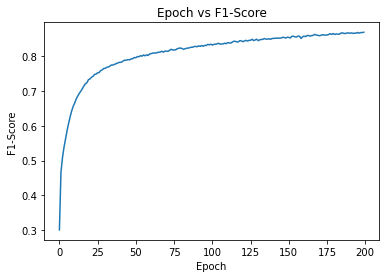

Test F1-Score 0.854538083076477, Época:135

Test F1-Score 0.8543737530708313, Época:198

Test F1-Score 0.8542002439498901, Época:178

Test F1-Score 0.8538526296615601, Época:139

Test F1-Score 0.8536705374717712, Época:164

Test F1-Score 0.8536136150360107, Época:191

Test F1-Score 0.8535959124565125, Época:176

Test F1-Score 0.8535805940628052, Época:142

Test F1-Score 0.8535430431365967, Época:126

Test F1-Score 0.8530155420303345, Época:158


Train F1-Score 0.8687926530838013, Época:200

Train F1-Score 0.8681344389915466, Época:196

Train F1-Score 0.8679001331329346, Época:198

Train F1-Score 0.8678914308547974, Época:199

Train F1-Score 0.8670347929000854, Época:186

Train F1-Score 0.8668367862701416, Época:189

Train F1-Score 0.8667363524436951, Época:192

Train F1-Score 0.8667083978652954, Época:190

Train F1-Score 0.8662736415863037, Época:185

Train F1-Score 0.8662710189819336, Época:194


Validation F1-Score 0.8490853905677795, Época:144

Validation F1-Score 0.848780632019043,

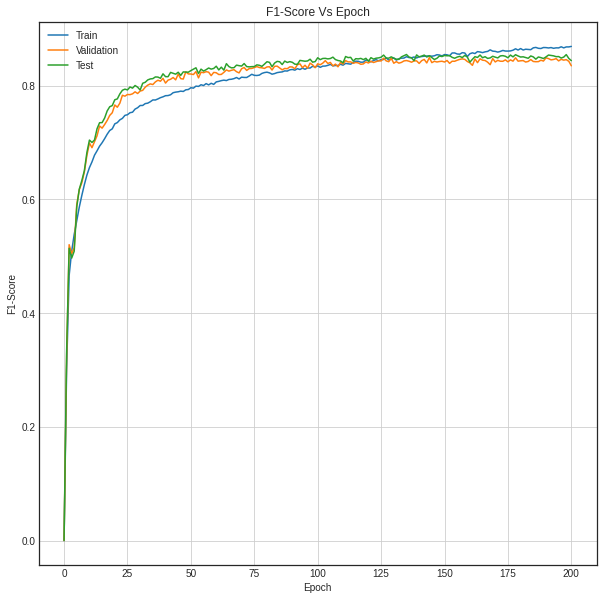

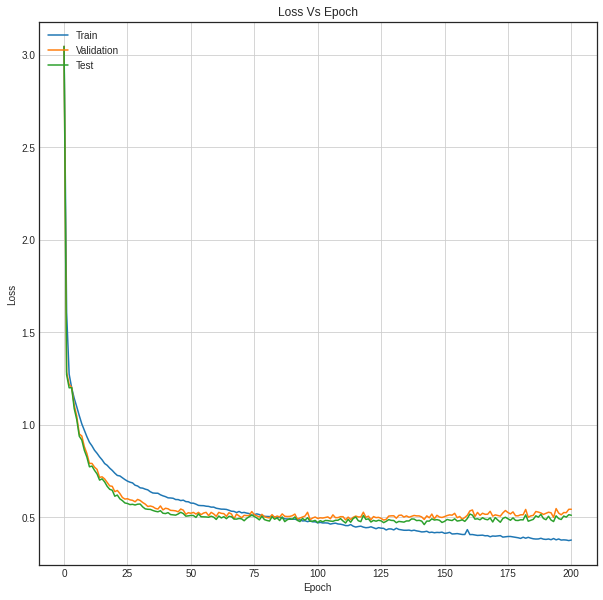

In [19]:
# plot metrics
plt.plot(history.history['f1_m'])
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Epoch vs F1-Score')
plt.show()

#GRÁFICOS DE LAS TRES CURVAS TRAIN TEST Y VALIDACIÓN
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)


Baseline Error train: 5.94%
Baseline Error dev: 16.55%
Baseline Error test: 15.62%
Accuracy: 0.943484882252433
F1 score: 0.943903097352923
Recall: 0.943484882252433
Precision: 0.9456532115974103

 clasification report:
               precision    recall  f1-score   support

           1       0.97      0.89      0.93      9563
           3       0.95      0.93      0.94      1158
           4       0.96      0.94      0.95      1481
           8       1.00      0.76      0.86        71
           9       0.85      0.87      0.86      2896
          12       0.85      0.90      0.88      5006
          13       0.98      0.97      0.98      2465
          14       0.93      0.93      0.93      1717
          16       0.95      0.88      0.91       434
          17       0.82      0.94      0.88      3605
          18       0.99      0.96      0.97      8282
          19       0.96      0.95      0.95      2765
          20       0.98      0.99      0.99     14401

    accuracy          

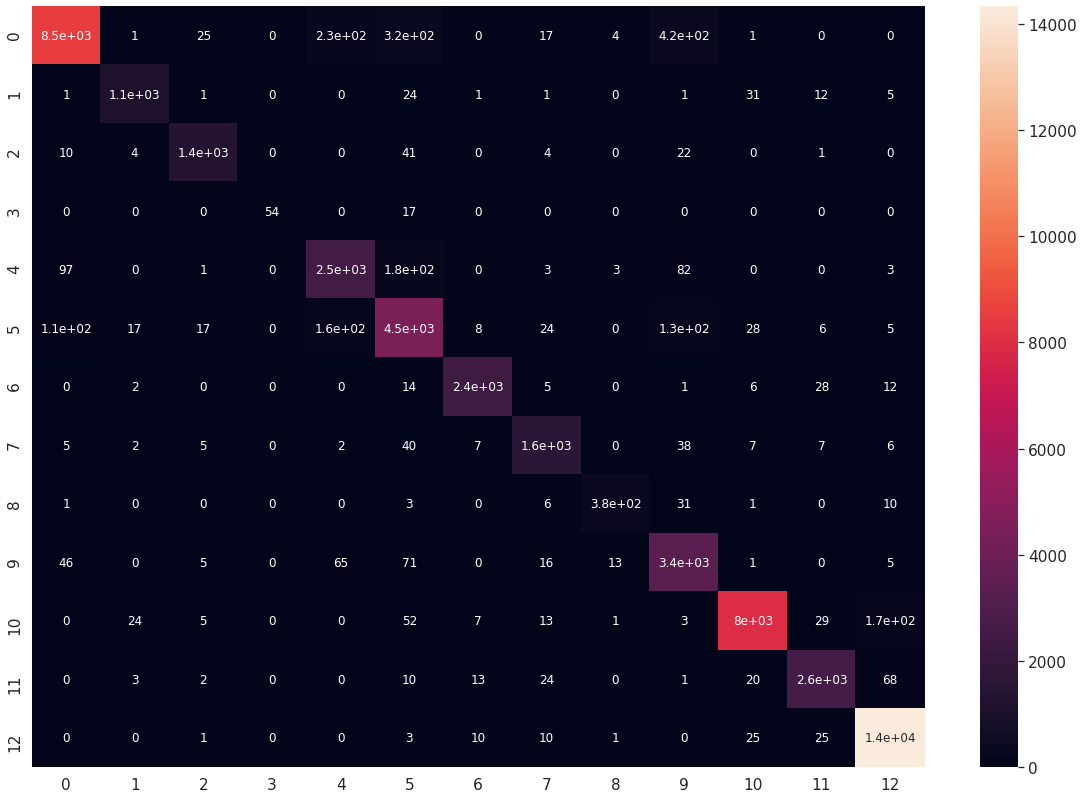

Accuracy: 0.8338781575037147
F1 score: 0.8350039632778042
Recall: 0.8338781575037147
Precision: 0.8401034998845768

 clasification report:
               precision    recall  f1-score   support

           1       0.91      0.80      0.85      1248
           3       0.75      0.69      0.72       155
           4       0.79      0.75      0.77       180
           8       0.33      0.17      0.22         6
           9       0.68      0.67      0.67       341
          12       0.61      0.71      0.66       599
          13       0.90      0.88      0.89       340
          14       0.68      0.69      0.68       218
          16       0.51      0.33      0.40        57
          17       0.62      0.78      0.69       430
          18       0.91      0.89      0.90      1055
          19       0.87      0.78      0.83       362
          20       0.94      0.97      0.96      1739

    accuracy                           0.83      6730
   macro avg       0.73      0.70      0.71     

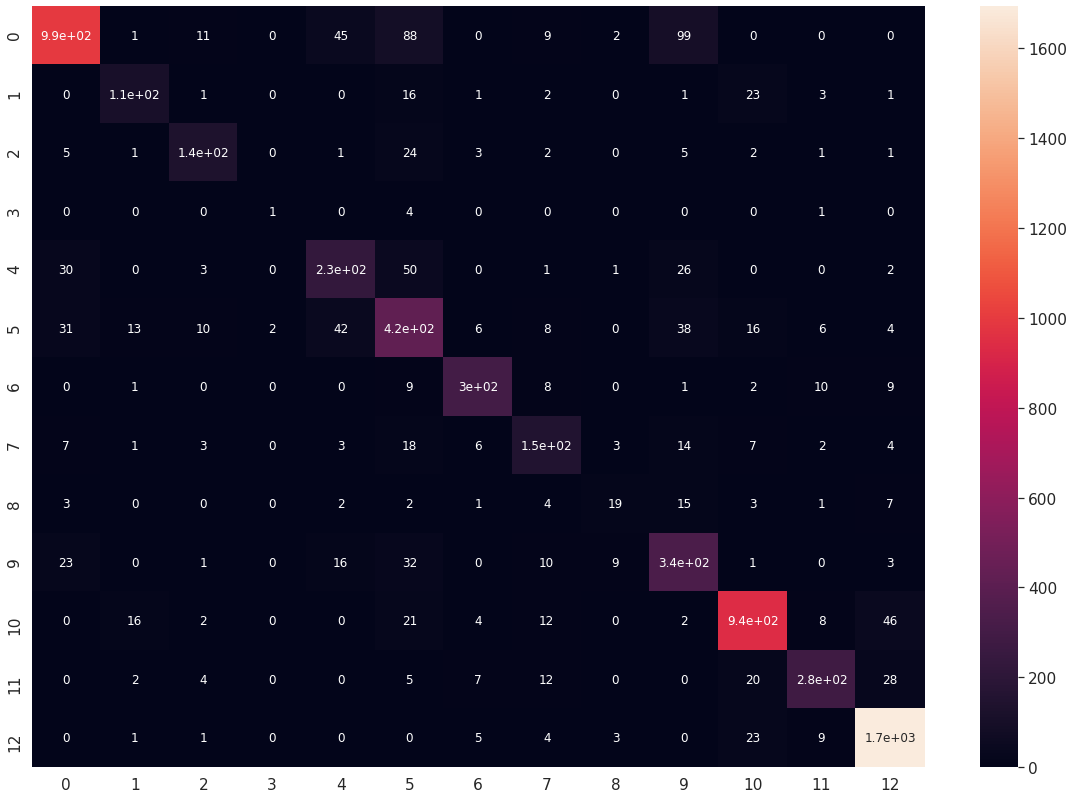

Accuracy: 0.8429653840439756
F1 score: 0.8429468155434254
Recall: 0.8429653840439756
Precision: 0.8458572289608016

 clasification report:
               precision    recall  f1-score   support

           1       0.90      0.81      0.85      1220
           3       0.72      0.70      0.71       145
           4       0.80      0.80      0.80       166
           8       0.40      0.29      0.33         7
           9       0.66      0.68      0.67       319
          12       0.66      0.72      0.68       575
          13       0.87      0.83      0.85       325
          14       0.67      0.71      0.69       201
          16       0.52      0.29      0.37        58
          17       0.70      0.82      0.75       497
          18       0.92      0.90      0.91      1059
          19       0.85      0.79      0.82       372
          20       0.94      0.98      0.96      1787

    accuracy                           0.84      6731
   macro avg       0.74      0.72      0.72     

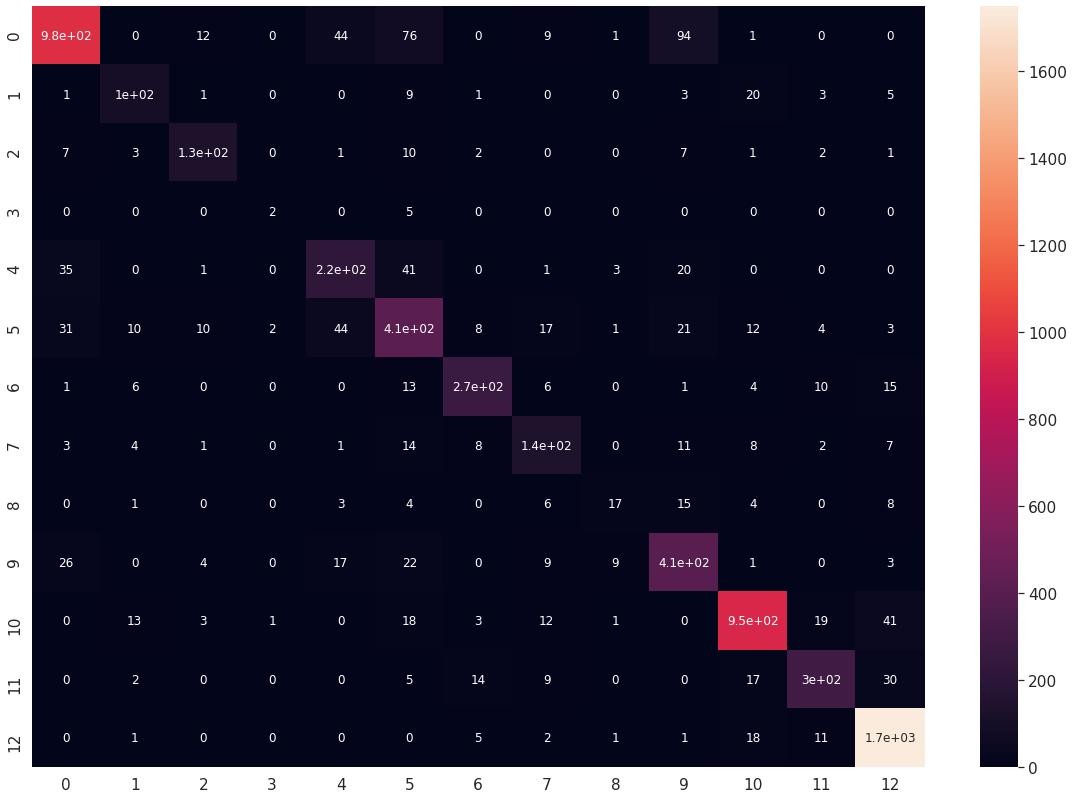

In [21]:
#model = tf.keras.models.load_model(log_Dir+'/saved-model-169-0.9455.hdf5', custom_objects={'f1_m':f1_m})
scores = model.evaluate(X_train, one_hot_labels_train, verbose=0)
print("Baseline Error train: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_dev, one_hot_labels_validation, verbose=0)
print("Baseline Error dev: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))

predictions = model.predict(X_train)

metrics(Y_train, [argmax(x) for x in predictions])

predictions = model.predict(X_dev)

metrics(Y_dev, [argmax(x) for x in predictions])

predictions = model.predict(X_test)

metrics(Y_test, [argmax(x) for x in predictions])